In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

old_results = pd.read_csv('CLUMPS_2018_results.txt',sep='\t')


#new_results = pd.read_csv('clumps_output_pancan.tsv',sep='\t')
new_results = pd.read_csv('clumps_output_50_genes.tsv',sep='\t')

In [2]:
new_results.index = (new_results['GENE_NAMES'] + ':' + new_results['PDBID-CHAIN'] + ':' + new_results['MAP_START'].astype(str) + ':' + new_results['MAP_END'].astype(str))
old_results.index = (old_results['GENE_NAMES'] + ':' + old_results['PDBID-CHAIN'] + ':' + old_results['MAP_START'].astype(str) + ':' + old_results['MAP_END'].astype(str))
new_results = new_results.loc[~new_results.index.isna()]
old_results = old_results.loc[~old_results.index.isna()]

In [3]:
new_results

,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
RHOA:6bc0-F:3:181,0,RHOA,0.000022,0.001540,120,53,3+5+17+20+22+23+24+26+28+34+37+39+40+41+42+47+...,P61586,P61586,6bc0-F,100.0,NaN,193,3,181,RHOA,0.000067
CNOT9:4cru-B:19:285,1,CNOT9,0.000040,0.001540,55,38,22+27+50+51+75+82+84+87+88+92+97+104+109+111+1...,Q92600,Q92600,4cru-B,100.0,"CNOT9 ARM DOMAIN, RESIDUES 19-285",299,19,285,NaN,-1.000000
CDC42BPG:4aw2-A:2:401,2,CDC42BPG,0.010673,0.273946,46,39,65+68+81+93+96+107+129+158+162+166+168+169+178...,Q6DT37,O54874,4aw2-A,69.3,"KINASE DOMAIN, RESIDUES 2-424",1551,2,401,NaN,-1.000000
UBC:5wvo-B:1:76,3,UBC,0.026750,0.378644,15,12,13+21+25+29+30+32+33+40+44+52+54+60,P0CG48,P62979,5wvo-B,100.0,NaN,685,1,76,NaN,-1.000000
OR4D9:3v2w-A:2:297,4,OR4D9,0.031168,0.378644,73,66,3+4+7+11+33+34+55+56+57+58+68+74+75+76+79+83+8...,Q8NGE8,P21453,3v2w-A,27.1,NaN,314,2,297,NaN,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMC1B:4rsj-A:427:727,72,SMC1B,0.691000,0.728863,53,46,430+434+464+475+477+479+481+494+496+502+505+51...,Q8NDV3,Q8TZY2,4rsj-A,25.3,SMC HINGE,1235,427,727,NaN,-1.000000
STIP1:2lni-A:356:477,73,STIP1,0.774750,0.806159,19,18,367+387+393+399+400+413+418+419+425+433+446+44...,P31948,P31948,2lni-A,100.0,"TPR REPEATS 7-9, RESIDUES 356-477",543,356,477,NaN,-1.000000
UBC:2y5b-F:229:379,74,UBC,0.814688,0.831233,23,24,234+239+240+244+260+261+265+269+274+275+282+28...,P0CG48,P0CG47,2y5b-F,100.0,"LINEAR DIUBIQUITIN ALDEHYDE, RESIDUES 1-152",685,229,379,NaN,-1.000000
FAT2:3q2w-A:1890:2370,75,FAT2,0.820438,0.831233,70,60,1891+1901+1904+1908+1913+1919+1933+1937+1951+1...,Q9NYQ8,P15116,3q2w-A,22.7,UNP RESIDUES 160-711,4349,1890,2370,NaN,-1.000000


In [4]:
old_results

,GENE_NAMES,UNIPROT_ID,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,NOTES
ATM:5np1-A:3:3056,ATM,Q13315,"C,S,M",Q13315,5np1-A,NaN,3056.0,3,3056,100.0,388,403,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
BRAF:3d4q-B:448:723,BRAF,P15056,"C,S,M",P15056,3d4q-B,NaN,766.0,448,723,100.0,61,801,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
MTOR:5h64-A:210:2549,MTOR,P42345,"C,S,M",P42345,5h64-A,NaN,2549.0,210,2549,100.0,300,367,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
PIK3CA:5fi4-A:2:1062,PIK3CA,P42336,"C,S,M",P42336,5fi4-A,NaN,1068.0,2,1062,100.0,211,1625,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
PPP2R1A:1b3u-B:2:589,PPP2R1A,P30153,"C,S,M",P30153,1b3u-B,NaN,589.0,2,589,100.0,122,218,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSPAN19:2m7z-A:110:211,TSPAN19,P0C672,NaN,Q8ITD7,2m7z-A,NaN,248.0,110,211,20.6,11,12,1.0,1.0,-1.0,NaN
TTN:4yh7-A:26691:27202,TTN,Q8WZ42,NaN,Q64487,4yh7-A,NaN,34350.0,26691,27202,22.8,101,112,1.0,1.0,-1.0,NaN
VWDE:2ygq-A:1076:1326,VWDE,Q8N2E2,NaN,Q9Y5W5,2ygq-A,NaN,1590.0,1076,1326,20.9,14,16,1.0,1.0,-1.0,NaN
ZNF772:1tf6-D:138:346,ZNF772,Q68DY9,NaN,P03001,1tf6-D,NaN,489.0,138,346,25.2,25,25,1.0,1.0,-1.0,NaN


In [5]:
old_only = old_results.loc[~old_results.index.isin(new_results.index)]
new_only = new_results.loc[~new_results.index.isin(old_results.index)]


new_results = new_results.loc[new_results.index.isin(old_results.index)]
old_results = old_results.loc[old_results.index.isin(new_results.index)]
new_results = new_results.loc[old_results.index]
old_results = old_results.loc[new_results.index]

In [6]:
old_results

,GENE_NAMES,UNIPROT_ID,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,NOTES
RHOA:6bc0-F:3:181,RHOA,P61586,"C,S,M",P61586,6bc0-F,NaN,193.0,3,181,100.0,53,120,0.000002,0.002424,0.000137,NaN
CNOT9:4cru-B:19:285,CNOT9,Q92600,NaN,Q92600,4cru-B,NaN,299.0,19,285,100.0,38,55,0.000076,0.048221,-1.000000,NaN
NF2:4zri-B:21:311,NF2,P35240,"C,S",P35240,4zri-B,NaN,595.0,21,311,100.0,44,49,0.013500,0.624782,0.201974,NaN
HELLS:5jxr-A:212:750,HELLS,Q9NRZ9,NaN,G2QFM3,5jxr-A,NaN,838.0,212,750,43.4,52,54,0.027500,0.677233,-1.000000,NaN
UBC:5wvo-B:1:76,UBC,P0CG48,NaN,P62979,5wvo-B,NaN,685.0,1,76,100.0,12,15,0.033000,0.695499,-1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FAT2:3q2w-A:1890:2370,FAT2,Q9NYQ8,NaN,P15116,3q2w-A,NaN,4349.0,1890,2370,22.7,60,70,0.651000,0.956838,-1.000000,NaN
UBC:2y5b-F:229:379,UBC,P0CG48,NaN,P0CG47,2y5b-F,NaN,685.0,229,379,100.0,24,23,0.688000,0.962156,-1.000000,NaN
FAT2:5szn-A:751:1237,FAT2,Q9NYQ8,NaN,Q91XX9,5szn-A,NaN,4349.0,751,1237,33.4,80,88,0.799000,0.972752,-1.000000,NaN
SCN2A:5gjw-A:1197:1782,SCN2A,Q99250,NaN,P07293,5gjw-A,NaN,2005.0,1197,1782,26.3,113,128,0.799000,0.972752,-1.000000,NaN


In [7]:
new_results

,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
RHOA:6bc0-F:3:181,0,RHOA,0.000022,0.001540,120,53,3+5+17+20+22+23+24+26+28+34+37+39+40+41+42+47+...,P61586,P61586,6bc0-F,100.0,NaN,193,3,181,RHOA,0.000067
CNOT9:4cru-B:19:285,1,CNOT9,0.000040,0.001540,55,38,22+27+50+51+75+82+84+87+88+92+97+104+109+111+1...,Q92600,Q92600,4cru-B,100.0,"CNOT9 ARM DOMAIN, RESIDUES 19-285",299,19,285,NaN,-1.000000
NF2:4zri-B:21:311,18,NF2,0.121250,0.457694,49,44,59+67+69+84+91+92+94+95+96+98+103+107+114+123+...,P35240,P35240,4zri-B,100.0,"FERM DOMAIN, UNP RESIDUES 1-320",595,21,311,NF2,0.181875
HELLS:5jxr-A:212:750,13,HELLS,0.082375,0.453062,54,52,219+220+224+228+229+230+235+253+264+270+275+28...,Q9NRZ9,G2QFM3,5jxr-A,43.4,UNP RESIDUES 81-803,838,212,750,NaN,-1.000000
UBC:5wvo-B:1:76,3,UBC,0.026750,0.378644,15,12,13+21+25+29+30+32+33+40+44+52+54+60,P0CG48,P62979,5wvo-B,100.0,NaN,685,1,76,NaN,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FAT2:3q2w-A:1890:2370,75,FAT2,0.820438,0.831233,70,60,1891+1901+1904+1908+1913+1919+1933+1937+1951+1...,Q9NYQ8,P15116,3q2w-A,22.7,UNP RESIDUES 160-711,4349,1890,2370,NaN,-1.000000
UBC:2y5b-F:229:379,74,UBC,0.814688,0.831233,23,24,234+239+240+244+260+261+265+269+274+275+282+28...,P0CG48,P0CG47,2y5b-F,100.0,"LINEAR DIUBIQUITIN ALDEHYDE, RESIDUES 1-152",685,229,379,NaN,-1.000000
FAT2:5szn-A:751:1237,63,FAT2,0.533312,0.641642,88,80,760+763+772+775+777+785+788+790+800+806+817+82...,Q9NYQ8,Q91XX9,5szn-A,33.4,NaN,4349,751,1237,NaN,-1.000000
SCN2A:5gjw-A:1197:1782,60,SCN2A,0.493063,0.622390,128,113,1200+1204+1208+1210+1211+1219+1230+1235+1237+1...,Q99250,P07293,5gjw-A,26.3,NaN,2005,1197,1782,NaN,-1.000000


/tmp/ipykernel_1751/3735176787.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  results['gene'] = results.index.str.replace(':[0-9]*:[0-9]*','')


0.7860190822587345
2.5055214553563815e-17


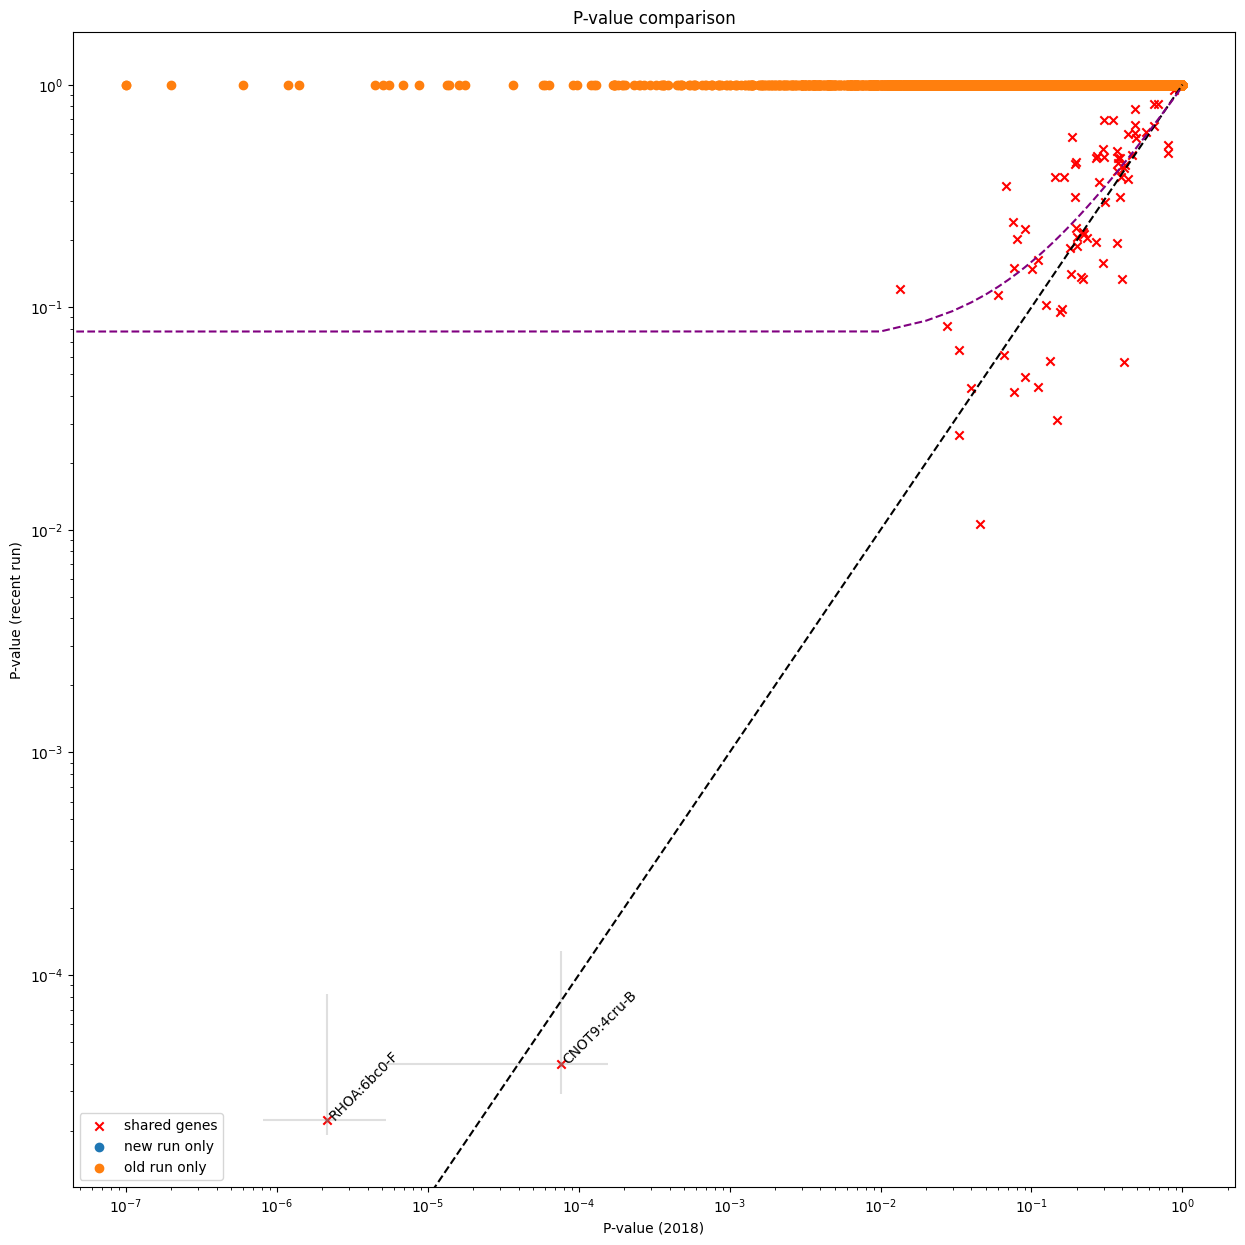

In [8]:
from scipy.stats import beta, betabinom, linregress





oldperm = 10000000
newperm = 100000




old_results.loc[old_results['CLUMPS_P'] == 0, 'CLUMPS_P'] = 1/oldperm
new_results.loc[new_results['CLUMPS_P'] == 0, 'CLUMPS_P'] = 1/newperm

results = pd.DataFrame(index=old_results.index)
results['oldps'] = old_results['CLUMPS_P']
results['newps'] = new_results['CLUMPS_P']

results = results.loc[(results['oldps'] < 0.01) | (results['newps'] < 0.01)]
results['gene'] = results.index.str.replace(':[0-9]*:[0-9]*','')


olda = results['oldps']*oldperm
oldb = oldperm - results['oldps']*oldperm

old95ci = beta.interval(0.95,olda,oldb)

newa = results['newps']*newperm
newb = newperm - results['newps']*newperm

new95ci = beta.interval(0.95,newa,newb)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,15)

lin = linregress(old_results['CLUMPS_P'],new_results['CLUMPS_P'])
print(lin.rvalue)
print(lin.pvalue)

xl = np.arange(0,1,0.01)
yl = xl*lin.slope + lin.intercept



ax.errorbar(results['oldps'],results['newps'],xerr=old95ci,yerr=new95ci,marker='.',linestyle='',alpha=0.25,color='grey')
ax.scatter(old_results['CLUMPS_P'],new_results['CLUMPS_P'],marker='x',color='red')
#ax.scatter(results['oldps'],results['newps'],marker='x',color='red')

ax.scatter(np.ones(len(new_only['CLUMPS_P'])),new_only['CLUMPS_P'])
ax.scatter(old_only['CLUMPS_P'],np.ones(len(old_only['CLUMPS_P'])))


oldtmp = old_only.loc[old_only['CLUMPS_P']<0.00001]

    

ax.plot([0, 1],[0, 1],linestyle='--',color='black')
ax.plot(xl,yl,linestyle='--',color='purple')
ax.set_title('P-value comparison')
ax.set_xlabel('P-value (2018)')
ax.set_ylabel('P-value (recent run)')
plt.yscale("log")
plt.xscale("log")
plt.legend(['shared genes','new run only','old run only'])
for i in range(0,len(results.index)):
    ax.text(results.iloc[i]['oldps'],results.iloc[i]['newps'],results.iloc[i]['gene'],rotation=45,size=10)
#for i in range(0,len(oldtmp.index)):
#    ax.text(oldtmp.iloc[i]['CLUMPS_P'],1,oldtmp.iloc[i]['GENE_NAMES'],size=8)

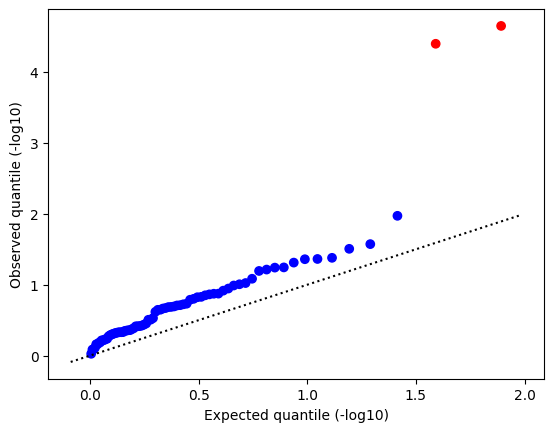

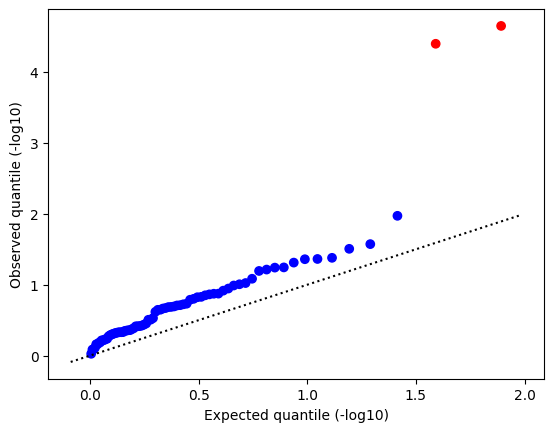

In [9]:
from capy import plots

plots.QQ(new_results['CLUMPS_P'])

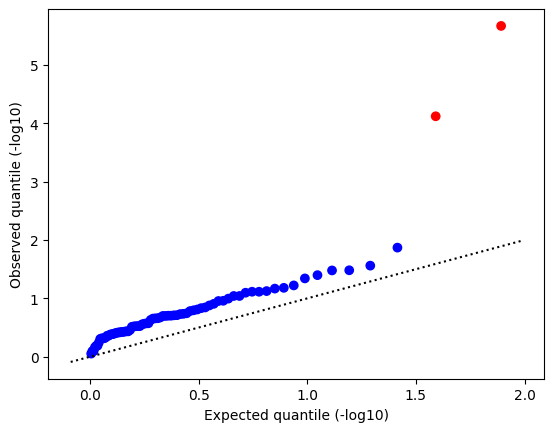

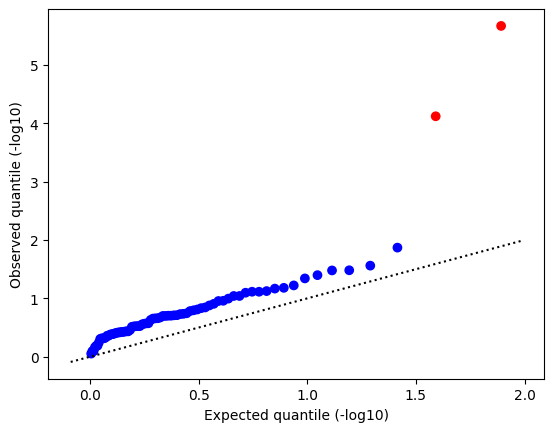

In [10]:
plots.QQ(old_results['CLUMPS_P'])

In [11]:
results

,oldps,newps,gene
RHOA:6bc0-F:3:181,0.000002,0.000022,RHOA:6bc0-F
CNOT9:4cru-B:19:285,0.000076,0.000040,CNOT9:4cru-B


In [12]:
from scipy.stats import linregress


results = linregress(results['oldps'],results['newps'])
print(results.rvalue)
print(results.pvalue)

0.9999999999999999
0.0


In [13]:
np.arange(0,1,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

False


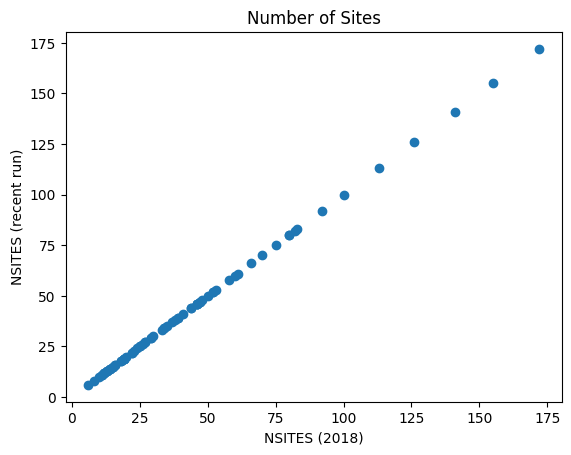

In [19]:
fig, ax = plt.subplots(1,1)

ax.scatter(old_results['NSITES'],new_results['NSITES'])
ax.set_title('Number of Sites')
ax.set_xlabel('NSITES (2018)')
ax.set_ylabel('NSITES (recent run)')
print(any(old_results['NSITES'] != new_results['NSITES']))

False

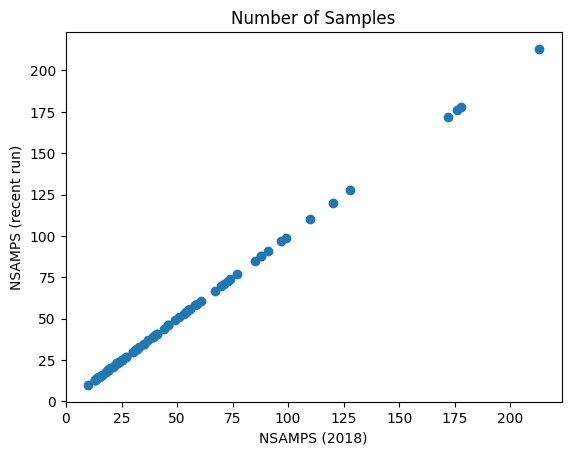

In [20]:
fig, ax = plt.subplots(1,1)


ax.scatter(old_results['NSAMPLES'],new_results['NSAMPLES'])

ax.set_title('Number of Samples')
ax.set_xlabel('NSAMPS (2018)')
ax.set_ylabel('NSAMPS (recent run)')
any(old_results['NSAMPLES']!=new_results['NSAMPLES'])

In [16]:
recap_results = pd.read_csv('clumps_output_50_genes_recap.tsv',sep='\t')
recap_results.index = (recap_results['GENE_NAMES'] + ':' + recap_results['PDBID-CHAIN'] + ':' + recap_results['MAP_START'].astype(str) + ':' + recap_results['MAP_END'].astype(str))
recap_results.loc[new_results.index]


,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
RHOA:6bc0-F:3:181,0,RHOA,0.000028,0.001550,120,53,3+5+17+20+22+23+24+26+28+34+37+39+40+41+42+47+...,P61586,P61586,6bc0-F,100.0,NaN,193,3,181,RHOA,0.000084
CNOT9:4cru-B:19:285,1,CNOT9,0.000040,0.001550,55,38,22+27+50+51+75+82+84+87+88+92+97+104+109+111+1...,Q92600,Q92600,4cru-B,100.0,"CNOT9 ARM DOMAIN, RESIDUES 19-285",299,19,285,NaN,-1.000000
NF2:4zri-B:21:311,18,NF2,0.112937,0.447344,49,44,59+67+69+84+91+92+94+95+96+98+103+107+114+123+...,P35240,P35240,4zri-B,100.0,"FERM DOMAIN, UNP RESIDUES 1-320",595,21,311,NF2,0.169406
HELLS:5jxr-A:212:750,13,HELLS,0.069125,0.380188,54,52,219+220+224+228+229+230+235+253+264+270+275+28...,Q9NRZ9,G2QFM3,5jxr-A,43.4,UNP RESIDUES 81-803,838,212,750,NaN,-1.000000
UBC:5wvo-B:1:76,3,UBC,0.026852,0.366120,15,12,13+21+25+29+30+32+33+40+44+52+54+60,P0CG48,P62979,5wvo-B,100.0,NaN,685,1,76,NaN,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FAT2:3q2w-A:1890:2370,75,FAT2,0.835562,0.846557,70,60,1891+1901+1904+1908+1913+1919+1933+1937+1951+1...,Q9NYQ8,P15116,3q2w-A,22.7,UNP RESIDUES 160-711,4349,1890,2370,NaN,-1.000000
UBC:2y5b-F:229:379,74,UBC,0.786000,0.806960,23,24,234+239+240+244+260+261+265+269+274+275+282+28...,P0CG48,P0CG47,2y5b-F,100.0,"LINEAR DIUBIQUITIN ALDEHYDE, RESIDUES 1-152",685,229,379,NaN,-1.000000
FAT2:5szn-A:751:1237,63,FAT2,0.510375,0.614045,88,80,760+763+772+775+777+785+788+790+800+806+817+82...,Q9NYQ8,Q91XX9,5szn-A,33.4,NaN,4349,751,1237,NaN,-1.000000
SCN2A:5gjw-A:1197:1782,60,SCN2A,0.494000,0.610576,128,113,1200+1204+1208+1210+1211+1219+1230+1235+1237+1...,Q99250,P07293,5gjw-A,26.3,NaN,2005,1197,1782,NaN,-1.000000


/tmp/ipykernel_1751/2634567791.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  results['gene'] = results.index.str.replace(':[0-9]*:[0-9]*','')


0.8047610244401608
1.1648246102635428e-18


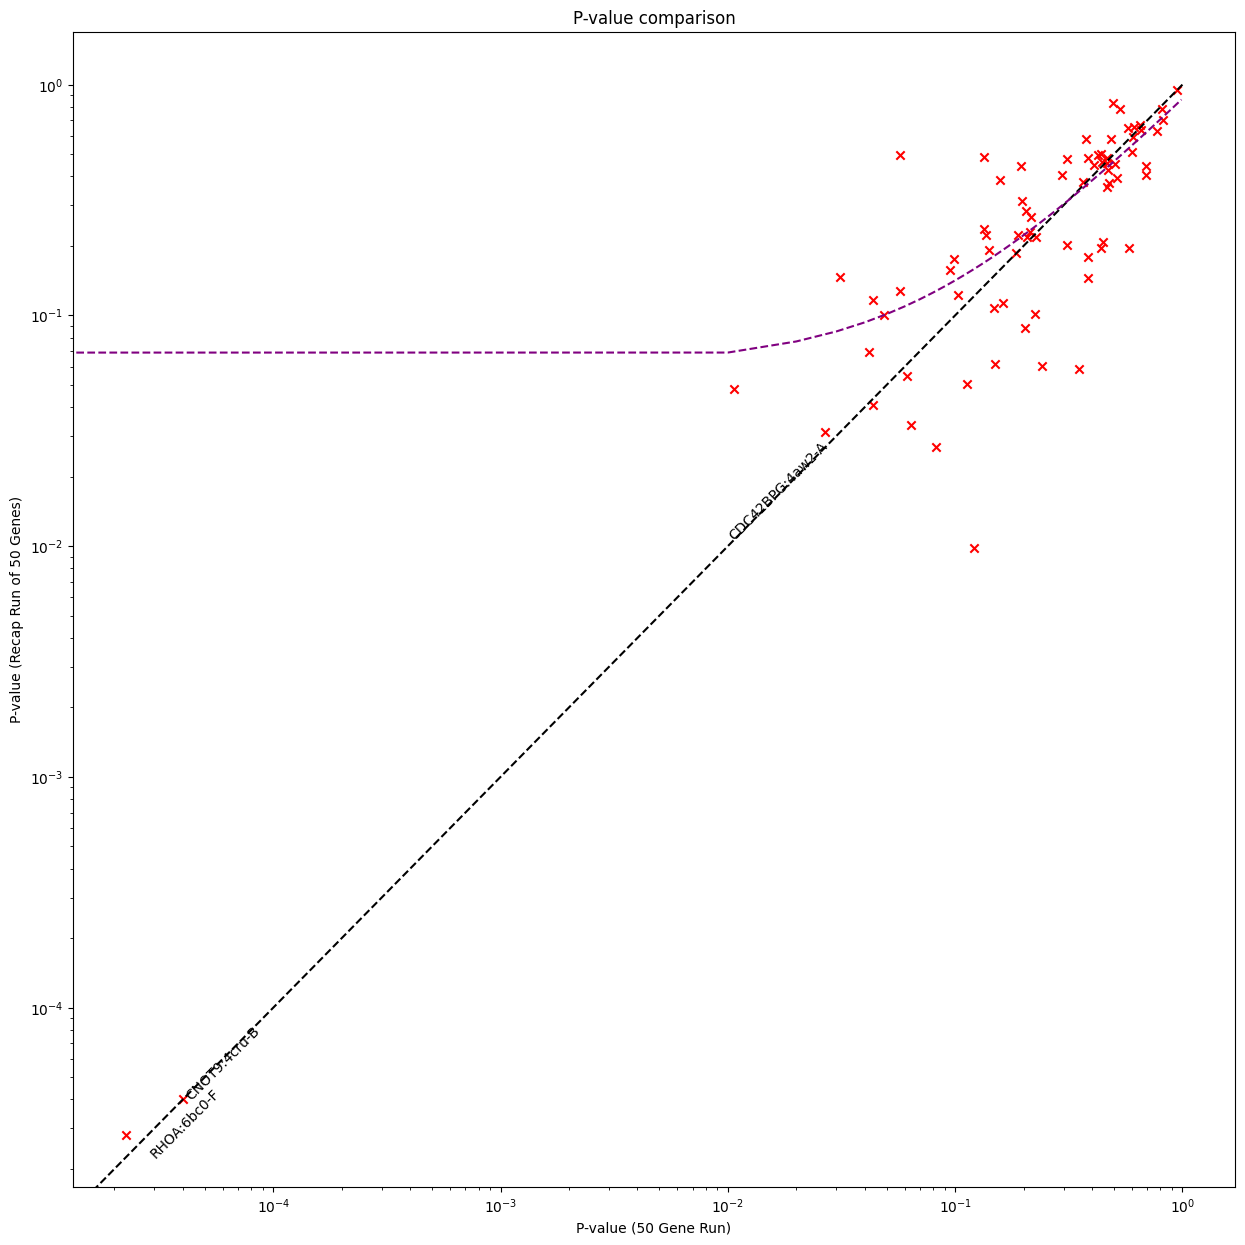

In [17]:
#oldperm = 10000000
#newperm = 100000




#old_results.loc[old_results['CLUMPS_P'] == 0, 'CLUMPS_P'] = 1/oldperm
new_results.loc[new_results['CLUMPS_P'] == 0, 'CLUMPS_P'] = 1/newperm

results = pd.DataFrame(index=recap_results.index)
results['oldps'] = recap_results['CLUMPS_P']
results['newps'] = new_results['CLUMPS_P']

results = results.loc[(results['oldps'] < 0.01) | (results['newps'] < 0.01)]
results['gene'] = results.index.str.replace(':[0-9]*:[0-9]*','')


#olda = results['oldps']*oldperm
#oldb = oldperm - results['oldps']*oldperm

#old95ci = beta.interval(0.95,olda,oldb)

#newa = results['newps']*newperm
#newb = newperm - results['newps']*newperm

#new95ci = beta.interval(0.95,newa,newb)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,15)

lin = linregress(new_results['CLUMPS_P'],recap_results['CLUMPS_P'])
print(lin.rvalue)
print(lin.pvalue)

xl = np.arange(0,1,0.01)
yl = xl*lin.slope + lin.intercept



#ax.errorbar(results['oldps'],results['newps'],xerr=old95ci,yerr=new95ci,marker='.',linestyle='',alpha=0.25,color='grey')
ax.scatter(new_results['CLUMPS_P'],recap_results['CLUMPS_P'],marker='x',color='red')
#ax.scatter(results['oldps'],results['newps'],marker='x',color='red')

#ax.scatter(np.ones(len(new_only['CLUMPS_P'])),new_only['CLUMPS_P'])
#ax.scatter(old_only['CLUMPS_P'],np.ones(len(old_only['CLUMPS_P'])))


#oldtmp = old_only.loc[old_only['CLUMPS_P']<0.00001]

    

ax.plot([0, 1],[0, 1],linestyle='--',color='black')
ax.plot(xl,yl,linestyle='--',color='purple')
ax.set_title('P-value comparison')
ax.set_xlabel('P-value (50 Gene Run)')
ax.set_ylabel('P-value (Recap Run of 50 Genes)')
plt.yscale("log")
plt.xscale("log")
#plt.legend(['shared genes','new run only','old run only'])
for i in range(0,len(results.index)):
    ax.text(results.iloc[i]['oldps'],results.iloc[i]['newps'],results.iloc[i]['gene'],rotation=45,size=10)

In [18]:
recap_results


,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
RHOA:6bc0-F:3:181,0,RHOA,0.000028,0.001550,120,53,3+5+17+20+22+23+24+26+28+34+37+39+40+41+42+47+...,P61586,P61586,6bc0-F,100.0,NaN,193,3,181,RHOA,0.000084
CNOT9:4cru-B:19:285,1,CNOT9,0.000040,0.001550,55,38,22+27+50+51+75+82+84+87+88+92+97+104+109+111+1...,Q92600,Q92600,4cru-B,100.0,"CNOT9 ARM DOMAIN, RESIDUES 19-285",299,19,285,NaN,-1.000000
CDC42BPG:4aw2-A:2:401,2,CDC42BPG,0.009813,0.251854,46,39,65+68+81+93+96+107+129+158+162+166+168+169+178...,Q6DT37,O54874,4aw2-A,69.3,"KINASE DOMAIN, RESIDUES 2-424",1551,2,401,NaN,-1.000000
UBC:5wvo-B:1:76,3,UBC,0.026852,0.366120,15,12,13+21+25+29+30+32+33+40+44+52+54+60,P0CG48,P62979,5wvo-B,100.0,NaN,685,1,76,NaN,-1.000000
OR4D9:3v2w-A:2:297,4,OR4D9,0.031310,0.366120,73,66,3+4+7+11+33+34+55+56+57+58+68+74+75+76+79+83+8...,Q8NGE8,P21453,3v2w-A,27.1,NaN,314,2,297,NaN,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMC1B:4rsj-A:427:727,72,SMC1B,0.703625,0.742180,53,46,430+434+464+475+477+479+481+494+496+502+505+51...,Q8NDV3,Q8TZY2,4rsj-A,25.3,SMC HINGE,1235,427,727,NaN,-1.000000
STIP1:2lni-A:356:477,73,STIP1,0.784813,0.806960,19,18,367+387+393+399+400+413+418+419+425+433+446+44...,P31948,P31948,2lni-A,100.0,"TPR REPEATS 7-9, RESIDUES 356-477",543,356,477,NaN,-1.000000
UBC:2y5b-F:229:379,74,UBC,0.786000,0.806960,23,24,234+239+240+244+260+261+265+269+274+275+282+28...,P0CG48,P0CG47,2y5b-F,100.0,"LINEAR DIUBIQUITIN ALDEHYDE, RESIDUES 1-152",685,229,379,NaN,-1.000000
FAT2:3q2w-A:1890:2370,75,FAT2,0.835562,0.846557,70,60,1891+1901+1904+1908+1913+1919+1933+1937+1951+1...,Q9NYQ8,P15116,3q2w-A,22.7,UNP RESIDUES 160-711,4349,1890,2370,NaN,-1.000000
